Illustrate the differences between an exponential and pareto distribution 

In [1]:
# load general packages
import numpy as np
import matplotlib.pyplot as plt

## Uncomment for nicer plots ##
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

In [177]:
N = 500
np.seed = 200

Draw from truncated exponential distribution

In [178]:
# Draw from uniform
x_uni = np.random.uniform(0,1,N)

# Put through the inverse cdf of the truncated exponential
x_expo = 1 - np.log(1 - x_uni)

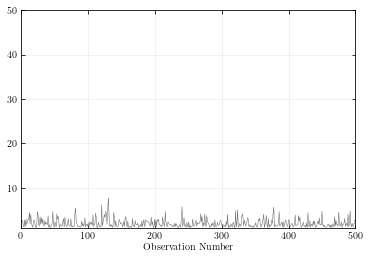

In [193]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_expo, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Observation Number')
# ax.set_ylabel('Value')
ax.set_xlim(0,len(x_expo))
ax.set_ylim(1, 50)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/exponential.pdf')

Draw from pareto distribution with $\alpha = 1.5$

In [180]:
alpha = 1.5
x_uni2 = np.random.uniform(0,1, N)

x_pareto = np.exp(-np.log(1-x_uni2)/alpha)

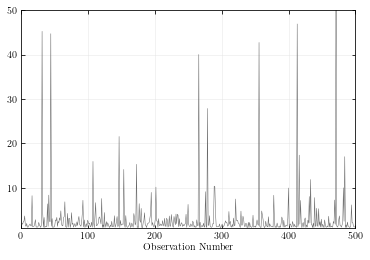

In [194]:
# Initialize the figure
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_pareto, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Observation Number')
# ax.set_ylabel('Value')
ax.set_xlim(0,len(x_pareto))
ax.set_ylim(1,50)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/pareto.pdf')

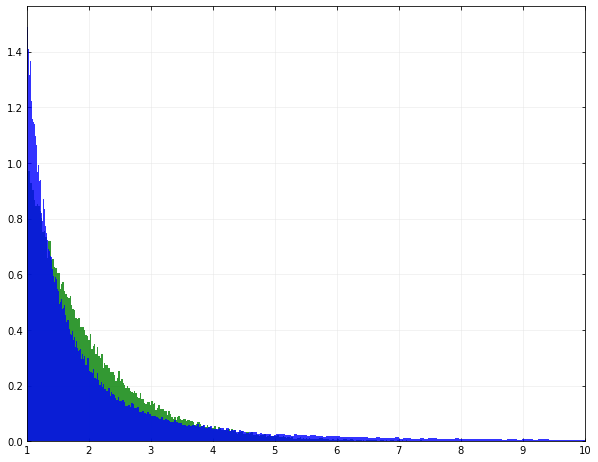

In [73]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.hist(x_expo, density = True, bins = 500, color = 'green', alpha = 0.8, zorder = 2)
ax.hist(x_pareto, density = True, bins = np.logspace(0,2, 500), color = 'blue', alpha = 0.8, zorder = 2)

# ax.set(xscale='log', yscale = 'log')
ax.set_xlim(1,10)

plt.show()

Plot the theoretical distributions

In [140]:
vals = np.linspace(1,100, 100000)
alpha = 2.5
lambdaa = 1/alpha

y_expo = 1/np.exp(-lambdaa)*lambdaa*np.exp(-lambdaa*vals)
y_pareto = alpha*vals**(-alpha-1)

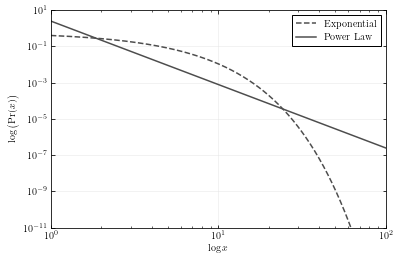

In [199]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.plot(vals,y_expo, color = '0.3', linestyle ='--', zorder = 2, label = 'Exponential')
ax.plot(vals,y_pareto, color = '0.3', zorder = 2, label = 'Power Law')

ax.set(xscale='log', yscale = 'log')
ax.set_xlim(1,100)
ax.set_ylim(1e-11,10)

ax.set_xlabel(r'$\log x$')
ax.set_ylabel(r'$\log \big(\mathrm{Pr} (x) \big)$')


ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/log_log.pdf')

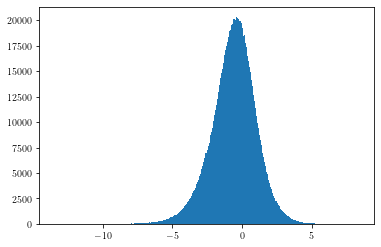

In [15]:
# N = 1000000
# x = np.random.pareto(1.5, N)

plt.hist(np.log(x), bins = 300)
plt.show()

In [23]:
np.max(np.log(x))

8.361414710431374

In [24]:
np.exp(8.362)

4281.248707017591

## Tests

Try to draw from a Pareto type 2 distribution.
Turn this into a function 'draw_pareto2'

In [43]:
N = 100000
mu = -1.0
alpha = 1.5
x_pareto_2 = np.empty(shape=N)

for i in range(N):
    
    rand = np.random.uniform(0,1)
    x_pareto_2[i] = mu + (1 - rand)**(-1/alpha) - 1

In [44]:
np.max(x_pareto_2)

8960.989831390467

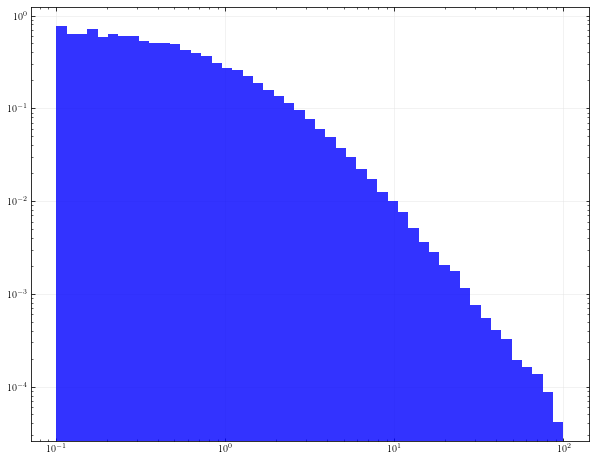

In [51]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9', zorder=0)
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

# ax.hist(x_expo, density = True, bins = 500, color = 'green', alpha = 0.8, zorder = 2)
ax.hist(x_pareto_2, density = True, bins = np.logspace(-1,2, 50), color = 'blue', alpha = 0.8, zorder = 2)

ax.set(xscale='log', yscale = 'log')

# ax.set_xlim(1,10)
plt.show()